Importing the Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Data Collection and Processing

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project/Car Price Prediction/car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#  fuel type category
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
# Seller type category 
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
# transmission category
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

Encoding the Categorical Data

In [ ]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

Splitting the data and Target

In [ ]:
x=df.drop(columns=['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

Splitting Training and Test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Model Training

1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# predicting on Training data
y_train_pred=lr.predict(x_train)

# R squard error
print ('Training ,R Squad Error : ',r2_score(y_train_pred,y_train))

Training ,R Squad Error :  0.8687518544775963


Visualize the actual prices and Predicted prices

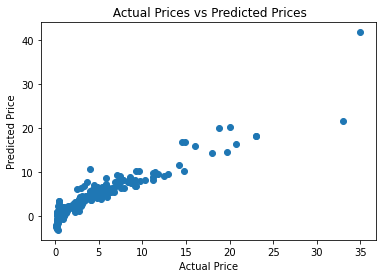

In [ ]:
plt.scatter(y_train,y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# predication testing data 
y_test_pred=lr.predict(x_test)
print ('Testing , R Squard error : ',r2_score(y_test_pred,y_test))

Testing , R Squard error :  0.7881496929417051


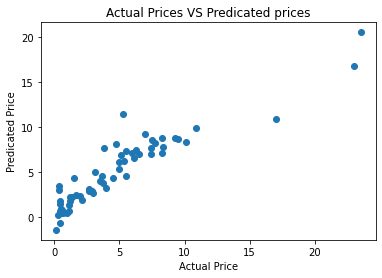

In [ ]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicated Price')
plt.title('Actual Prices VS Predicated prices')
plt.show()

2. Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
l=Lasso()
l.fit(x_train,y_train)

Lasso()

Model Evaluation

In [ ]:
# predication on training data
y_train.pred=l.predict(x_train)
print ('Train , R Square Error : ', r2_score(y_train,y_train_pred))

Train , R Square Error :  0.883979349675079


Visualize the actual prices and Predicted prices

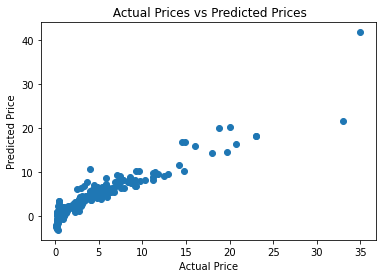

In [ ]:
plt.scatter(y_train,y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# predication on testing
y_test_pred=l.predict(x_test)
print ('Testing , R Squard error : ',r2_score(y_test_pred,y_test))

Testing , R Squard error :  0.6363959387420826


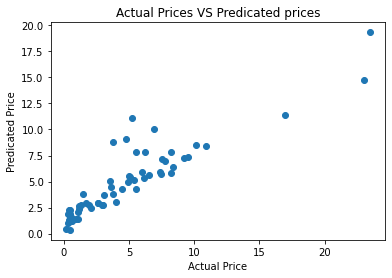

In [ ]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicated Price')
plt.title('Actual Prices VS Predicated prices')
plt.show()